## Uniform distribution for variance

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import invgamma, lognorm, norm, t, uniform

draw_from_invchi2 = lambda nu, t2, size: invgamma.rvs(nu / 2, size=size) * t2 * nu / 2
mean = 15
sample_variance = 45
sample_size = 5

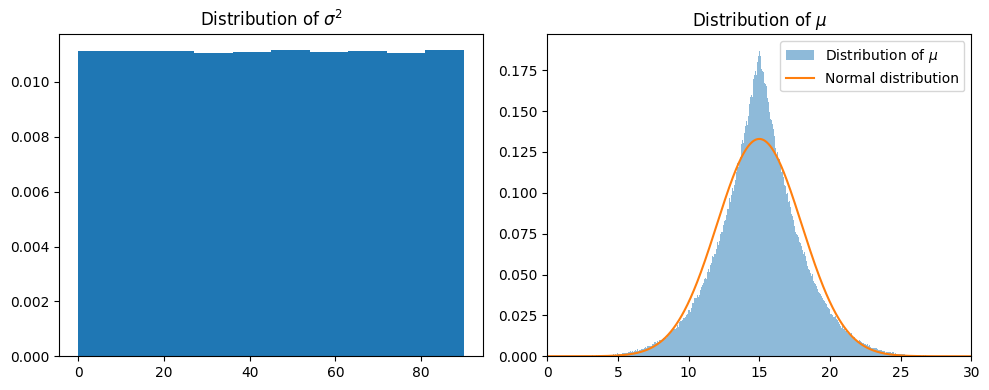

In [2]:
variance = uniform.rvs(0, sample_variance * 2, size=1_000_000)
mu = norm.rvs(mean, scale=np.sqrt(variance/sample_size))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(variance, density=True)
ax1.set_title(r"Distribution of $\sigma^2$")
ax2.hist(mu, density=True, bins=1_000, label=r"Distribution of $\mu$", alpha=0.5)
x = np.linspace(min(mu), max(mu), 1_000)
ax2.plot(x, norm.pdf(x, mean, scale=np.sqrt(sample_variance/sample_size)), label=r"Normal distribution")
ax2.set_xlim(0, 30)
ax2.legend()
ax2.set_title(r"Distribution of $\mu$")
fig.tight_layout()

## Lognormal distribution for variance

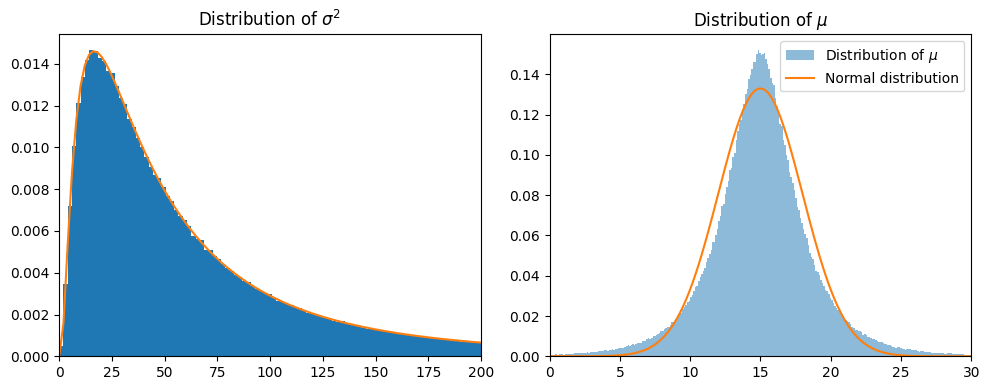

In [3]:
variance = lognorm.rvs(1, 0, sample_variance, size=1_000_000)
mu = norm.rvs(mean, scale=np.sqrt(variance/sample_size))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
x = np.hstack((np.linspace(0, 200, 100), np.array(1e6)))
ax1.hist(variance, bins=x, density=True)
ax1.plot(x, lognorm.pdf(x, 1, 0, sample_variance))
ax1.set_title(r"Distribution of $\sigma^2$")
ax2.hist(mu, density=True, bins=1_000, label=r"Distribution of $\mu$", alpha=0.5)
ax1.set_xlim(0, 200)
ax2.set_xlim(0, 30)
x = np.linspace(min(mu), max(mu), 1_000)
ax2.plot(x, norm.pdf(x, mean, scale=np.sqrt(sample_variance/sample_size)), label=r"Normal distribution")
ax2.legend()
ax2.set_title(r"Distribution of $\mu$")
fig.tight_layout()

## Inverse-chi-squared distribution for variance

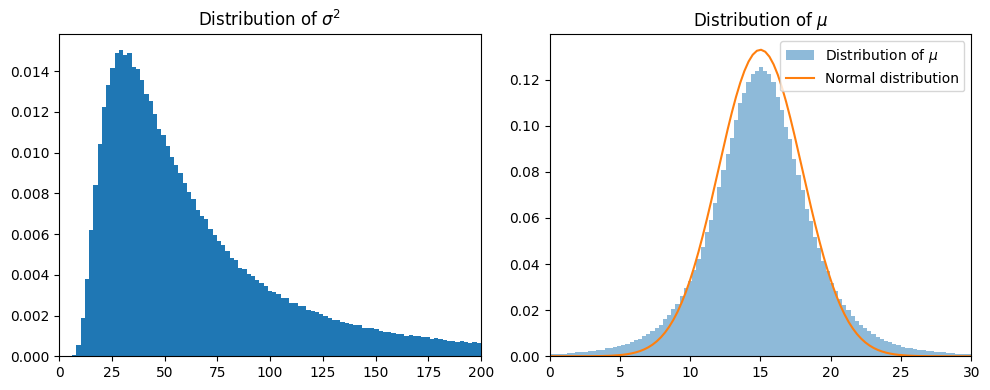

In [4]:
variance = draw_from_invchi2(sample_size - 1, sample_variance, size=1_000_000)
mu = norm.rvs(mean, scale=np.sqrt(variance/sample_size))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
x = np.hstack((np.linspace(0, 200, 100), np.array(1e6)))
ax1.hist(variance, bins=x, density=True)
ax1.set_title(r"Distribution of $\sigma^2$")
ax2.hist(mu, density=True, bins=1_000, label=r"Distribution of $\mu$", alpha=0.5)
ax1.set_xlim(0, 200)
ax2.set_xlim(0, 30)
x = np.linspace(min(mu), max(mu), 1_000)
ax2.plot(x, norm.pdf(x, mean, scale=np.sqrt(sample_variance/sample_size)), label=r"Normal distribution")
ax2.legend()
ax2.set_title(r"Distribution of $\mu$")
fig.tight_layout()

## t-distribution

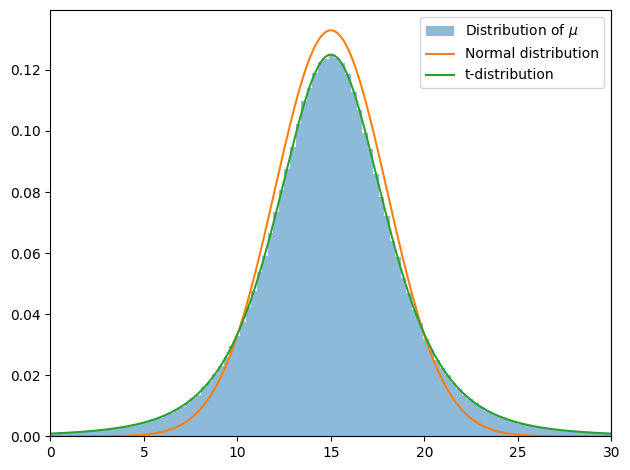

In [5]:
fig, ax = plt.subplots()
ax.hist(mu, density=True, bins=1_000, label=r"Distribution of $\mu$", alpha=0.5)
ax.set_xlim(0, 30)
x = np.linspace(min(mu), max(mu), 10_000)
ax.plot(x, norm.pdf(x, mean, scale=np.sqrt(sample_variance/sample_size)), label=r"Normal distribution")
ax.plot(x, t.pdf(x, sample_size-1, mean, np.sqrt(sample_variance/sample_size)), label=r"t-distribution")
ax.legend()
fig.tight_layout()

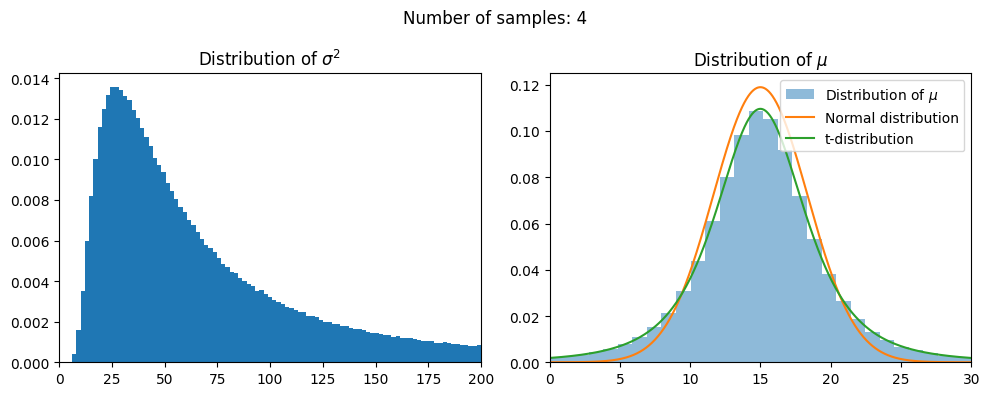

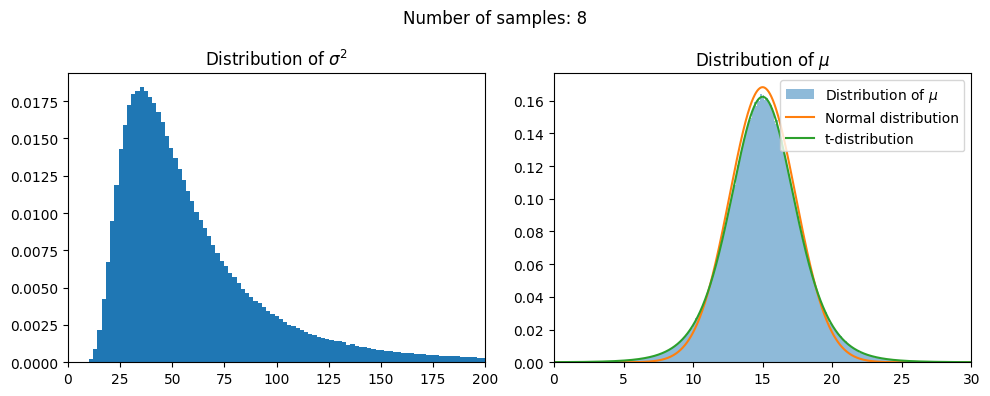

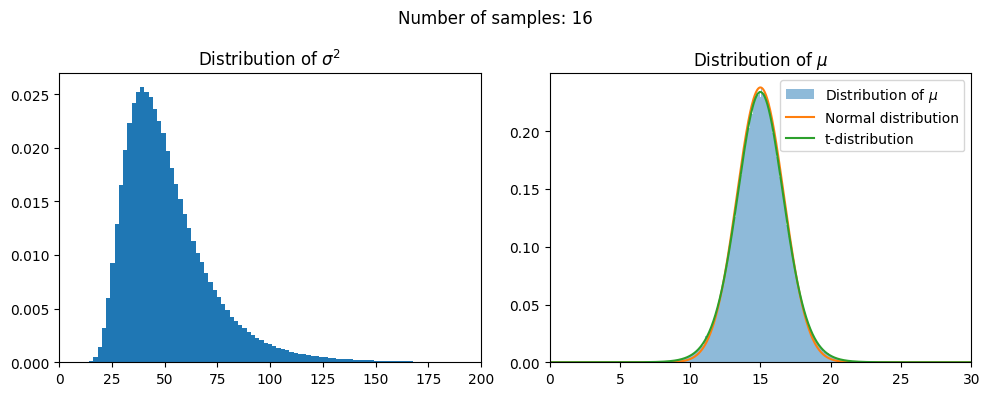

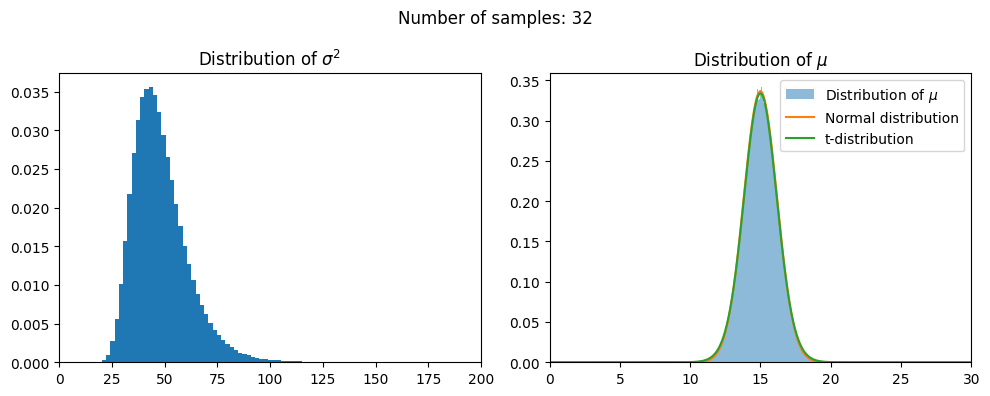

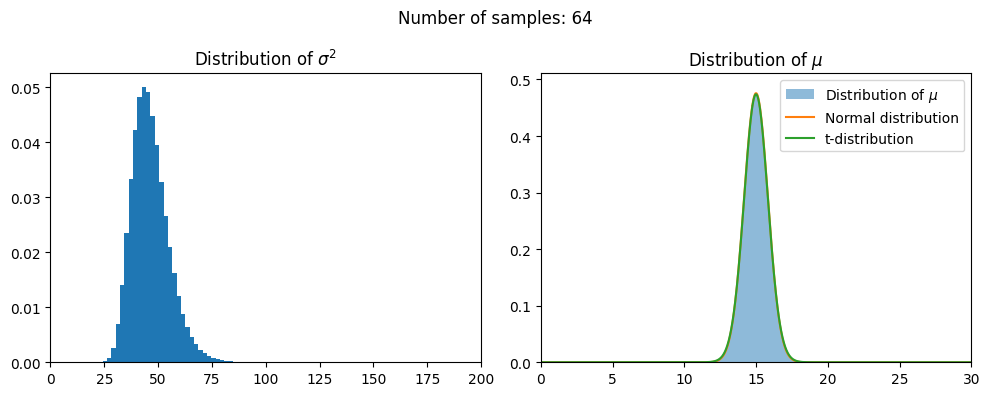

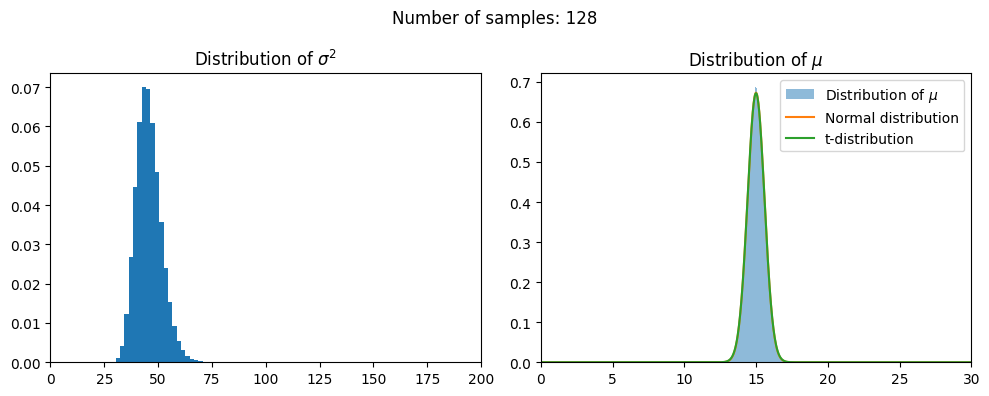

In [6]:
for sample_size in [4, 8, 16, 32, 64, 128]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    variance = draw_from_invchi2(sample_size - 1, sample_variance, size=1_000_000)
    mu = norm.rvs(mean, scale=np.sqrt(variance/sample_size))
    x = np.hstack((np.linspace(0, 200, 100), np.array(1e6)))
    ax1.hist(variance, bins=x, density=True)
    ax1.set_xlim(0, 200)
    ax1.set_title(r"Distribution of $\sigma^2$")
    ax2.hist(mu, density=True, bins=1_000, label=r"Distribution of $\mu$", alpha=0.5)
    ax2.set_xlim(0, 30)
    x = np.linspace(0, 30, 1_000)
    ax2.plot(x, norm.pdf(x, mean, scale=np.sqrt(sample_variance/sample_size)), label=r"Normal distribution")
    ax2.plot(x, t.pdf(x, sample_size-1, mean, np.sqrt(sample_variance/sample_size)), label=r"t-distribution")
    ax2.legend()
    ax2.set_title(r"Distribution of $\mu$")
    fig.suptitle(f"Number of samples: {sample_size}")
    fig.tight_layout()
    plt.draw()